# Part 1 - Prosper Loan Dataset Exploratory Project

by: Babatunde Akeredolu

## Introduction

This is an exploratory analysis of Prosper Loan dataset. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [2]:
# import all the necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays and carrying out mathematical operations
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualizations

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [597]:
# load the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [598]:
# overview of the data shape and composition

print(loan_data.shape) #print the no of rows and columns
print('\n')
print(loan_data.describe()) # descriptive statistics of the numeric variables

(113937, 81)


       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.

In [599]:
# print the first five rows
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [600]:
# all columns in the dataset
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [601]:
# check the index position of each column
for column in loan_data.columns:
    print(column, ": ", loan_data.columns.get_loc(column))

ListingKey :  0
ListingNumber :  1
ListingCreationDate :  2
CreditGrade :  3
Term :  4
LoanStatus :  5
ClosedDate :  6
BorrowerAPR :  7
BorrowerRate :  8
LenderYield :  9
EstimatedEffectiveYield :  10
EstimatedLoss :  11
EstimatedReturn :  12
ProsperRating (numeric) :  13
ProsperRating (Alpha) :  14
ProsperScore :  15
ListingCategory (numeric) :  16
BorrowerState :  17
Occupation :  18
EmploymentStatus :  19
EmploymentStatusDuration :  20
IsBorrowerHomeowner :  21
CurrentlyInGroup :  22
GroupKey :  23
DateCreditPulled :  24
CreditScoreRangeLower :  25
CreditScoreRangeUpper :  26
FirstRecordedCreditLine :  27
CurrentCreditLines :  28
OpenCreditLines :  29
TotalCreditLinespast7years :  30
OpenRevolvingAccounts :  31
OpenRevolvingMonthlyPayment :  32
InquiriesLast6Months :  33
TotalInquiries :  34
CurrentDelinquencies :  35
AmountDelinquent :  36
DelinquenciesLast7Years :  37
PublicRecordsLast10Years :  38
PublicRecordsLast12Months :  39
RevolvingCreditBalance :  40
BankcardUtilization : 

In [602]:
# create a copy of the dataset
loan_df = loan_data.copy()

In [603]:
# select only the columns of interest
loan_df = loan_df.iloc[:, np.r_[4,5,7,8,12,15:20,25:27,35:37,42,46:50,51,53,59,63,67]]

In [604]:
loan_df.columns # print all columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentDelinquencies', 'AmountDelinquent',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'OnTimeProsperPayments', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'MonthlyLoanPayment'],
      dtype='object')

In [605]:
loan_df.duplicated().sum() #check duplicated rows

0

In [606]:
loan_df.isnull().sum() #check number of null values

Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
EstimatedReturn              29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
CurrentDelinquencies           697
AmountDelinquent              7622
AvailableBankcardCredit       7544
DebtToIncomeRatio             8554
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
TotalProsperLoans            91852
OnTimeProsperPayments        91852
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
MonthlyLoanPayment               0
dtype: int64

In [607]:
loan_df.shape #print the no of rows and columns

(113937, 24)

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 variables each. After performing some cleaning on it, some columns were dropped leaving behind just 24 variables for each loan.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the features that are best for predicting the outcome of a loan and also the value of the loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect ProsperScore, OnTimeProsperPayments, IncomeRange, CurrentDelinquences, EmploymentStatus  to all have a level of effect on a loan's outcome status.

## Univariate Exploration

In this section, I performed univariate exploration on the features of interest. 

In [608]:
# use blue as default colour

def_color = sns.color_palette()[0]

In [609]:
# To avoid repetition of codes, I created functions for bar plot and distribution plot

def bar_plot(data_, x_axis, x_label, fig_size):
    plt.figure(figsize = fig_size) #set figure size
    sns.countplot(data = data_, x = x_axis, color = def_color) #set data and color
    plt.xlabel(x_label) #set x axis title
    plt.show()
    
def hist_plot(data_, x_axis, x_label, fig_size, bins_):
    plt.figure(figsize = fig_size) #set figure size
    plt.hist(data = data_, x = x_axis, color = def_color, bins = bins_) #set data and color
    plt.xlabel(x_label) #set x axis title
    plt.show()

Exploration in order of arrangements:

ProsperScore -> CurrentDelinquences -> IncomeRange -> EmploymentStatus -> DebttoIncomeRatio -> BorrowerRate -> OntimeProsperPayment -> Term -> ListingCategory

#### ProsperScore

ProsperScore is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

In [610]:
#check unique values in the ProsperScore column
loan_df['ProsperScore'].unique() 

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [611]:
#ProsperScore is within the range of 1-10
#I had to remove values that are not null and also outside the range
loan_df.drop(loan_df[loan_df['ProsperScore'] == 11 ].index, axis=0, inplace = True)

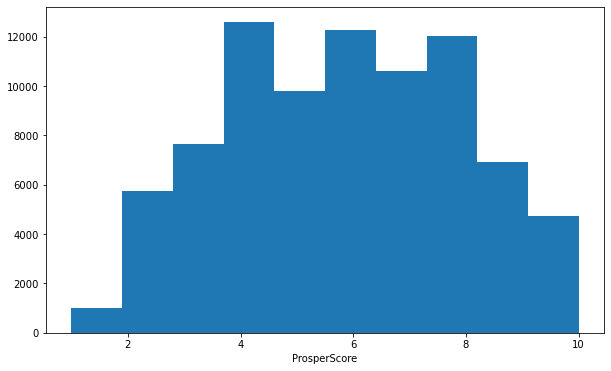

In [612]:
#distribution plot of ProsperScore

fig_size = [10,6]
hist_plot(loan_df, 'ProsperScore', 'ProsperScore', fig_size, 10)

Majority of the loan's risk scores are average with 4, 5 and 6 being the risk scores associated with most loans. However, more than half of the loans are on the positive side of the risk scores.

#### CurrentDelinquencies

CurrentDelinquencies refers to the Number of accounts delinquent at the time the credit profile was pulled.

In [613]:
#check unique values
loan_df['CurrentDelinquencies'].unique()

array([ 2.,  0.,  1.,  4.,  3., 14., 20.,  6.,  5., 13.,  9.,  8., nan,
       11., 18., 12., 19., 22., 17., 21., 16.,  7., 10., 25., 15., 23.,
       24., 27., 26., 41., 28., 33., 36., 64., 32., 30., 31., 59., 50.,
       57., 39., 45., 35., 83., 82., 37., 40., 51.])

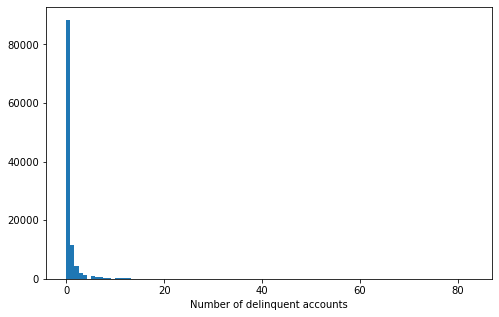

In [614]:
#histogram plot of CurrentDelinquencies

fig_size = [8,5] 
hist_plot(loan_df, 'CurrentDelinquencies', 'Number of delinquent accounts', fig_size, 100)

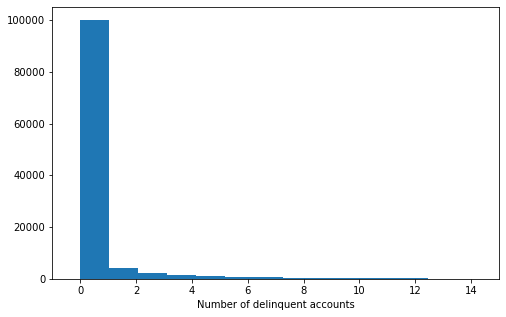

In [615]:
#investigating further

plt.figure(figsize = [8,5]) #set figure size
plt.hist(data = loan_df, x = 'CurrentDelinquencies', 
         color = def_color, bins = 80) #set data, color and bins
plt.xlim(-1,15)
plt.xlabel('Number of delinquent accounts') #set x axis title
plt.show()

As at the time the credit profiles were pulled, 79% of borrowers have no delinquent accounts. This, however, does not take into account the null values.

#### IncomeRange & Employment Status

In [616]:
# unique values and value counts of the two columns

print(loan_df['IncomeRange'].unique())
print('\n')
print(loan_df['IncomeRange'].value_counts())
print('\n')
print(loan_df['EmploymentStatus'].unique())
print('\n')
print(loan_df['EmploymentStatus'].value_counts())

['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']


$25,000-49,999    32064
$50,000-74,999    30684
$100,000+         16697
$75,000-99,999    16601
Not displayed      7741
$1-24,999          7267
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']


Employed         65957
Full-time        26341
Self-employed     6091
Not available     5347
Other             3772
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


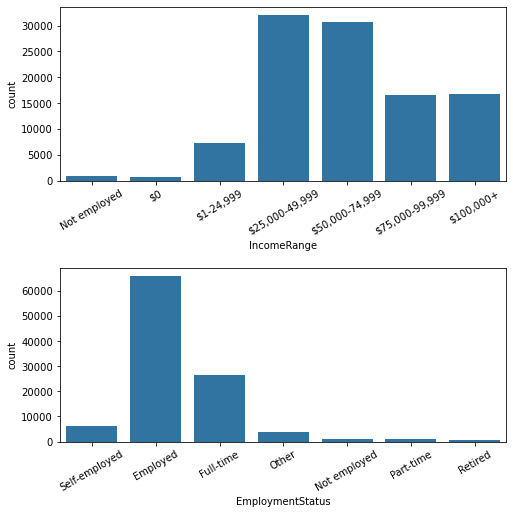

In [617]:
# let's visualize Income range and Employement Status together

fig, ax = plt.subplots(nrows=2, figsize = [8,8]) #customize layout

fig.subplots_adjust(hspace = 0.5) #distance between subplots

#arrangements for first subplot
categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
            '$75,000-99,999', '$100,000+']

#set data, color and orders for first subplot
sns.countplot(data = loan_df[loan_df['IncomeRange'] != 'Not displayed'], 
              x = 'IncomeRange', color = def_color, order = categories, 
              ax = ax[0])

#set data and color for second subplot
sns.countplot(data = loan_df[loan_df['EmploymentStatus'] != 'Not available'], 
              x = 'EmploymentStatus', color = def_color, ax = ax[1])

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=30) #first subplot x_label rotation
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=30) #second subplot x_label rotation

plt.show()

From the first chart, it's interesting to know that a huge number of borrowers are earning above the \\$25k mark although most fall within the range of \\$25k and \\$50k.

Looking at the second chart, there is a huge gap between the employed and unemployed as the data shows that only about 0.72% are unemployed.

#### DebttoIncomeRatio

In [618]:
loan_df['DebtToIncomeRatio'].value_counts()

0.18000    4068
0.22000    3628
0.17000    3553
0.14000    3485
0.20000    3416
           ... 
0.06375       1
0.06281       1
0.19960       1
0.17775       1
0.23284       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

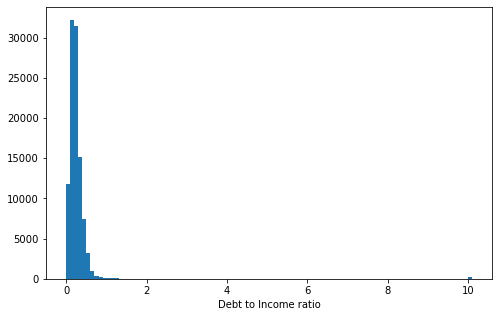

In [619]:
#histogram plot of CurrentDelinquencies

fig_size = [8,5]
binsize = 0.1
bin_ = np.arange(loan_df['DebtToIncomeRatio'].min(), 
                loan_df['DebtToIncomeRatio'].max()+binsize, binsize)
hist_plot(loan_df, 'DebtToIncomeRatio', 'Debt to Income ratio', fig_size, bin_)

Most of the data are on the far left of the axis suggesting low Debt to Income ratio. Also, looking at the far right, it can be seen that there is a little spike at the 10 point mark, this is not shocking as DebtToIncomeRatio greater than 10 were all capped at 10.01 hence the sudden rise.

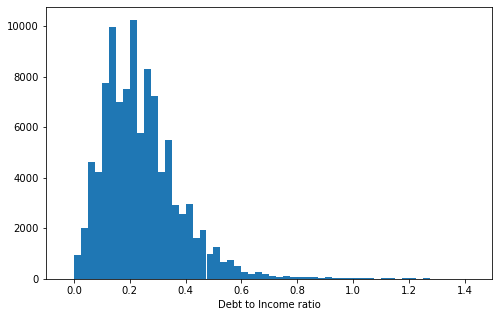

In [620]:
#more details

binsize = 0.025
bin_ = np.arange(loan_df['DebtToIncomeRatio'].min(), 
                loan_df['DebtToIncomeRatio'].max()+binsize, binsize) #customize bins interval

plt.figure(figsize = [8,5]) #set figure size
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', 
         color = def_color, bins = bin_) #set data, color and bins
plt.xlabel('Debt to Income ratio') #set x axis title
plt.xlim(-0.1, 1.5) #start  and end limit on x_axis

plt.show()

The above chart reveals more details about the data, huge data are clustered within  1.8 to 2.2 mark. Overall, the DebtToIncomeRatio is low.

#### BorrowerRate and OnTimeProsperPayments

The BorrowerRate refers to the borrower's interest rate for the loan while OnTimeProsperPayments is the number of on time payments the borrower had made on Prosper loans.

In [621]:
# max and min values for both variables
print('BorrowerRate max & min values are: ', loan_df['BorrowerRate'].max(), 
      ' & ', loan_df['BorrowerRate'].min())
print('OnTimeProsperPayments max & min values are: ', loan_df['OnTimeProsperPayments'].max(), 
      ' & ', loan_df['OnTimeProsperPayments'].min())

BorrowerRate max & min values are:  0.4975  &  0.0
OnTimeProsperPayments max & min values are:  141.0  &  0.0


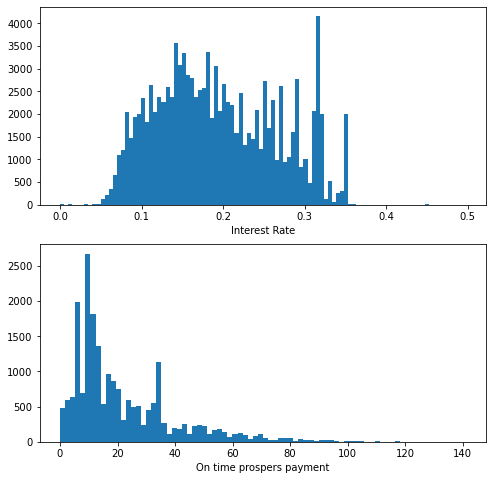

In [622]:
# BorrowerRate and OnTimeProsperPayments plots

fig, ax = plt.subplots(nrows=2, figsize = [8,8]) #customize layout

ax[0].hist(data = loan_df, x = 'BorrowerRate', bins = 100) #set data and bins for first plot
ax[1].hist(data = loan_df, x = 'OnTimeProsperPayments', bins = 80) #set data and bins for second plot
ax[0].set_xlabel('Interest Rate') #set x_axis label
ax[1].set_xlabel('On time prospers payment') #set x_axis label

plt.show()

Interest rate is highest at a little above 0.3 although most interest rates are within 0.15 and 2. Interestingly, there is a sharp decline as interest rate approaches 0.4, this is quite understandable as people tend to run away from loans with unusually high interest rate.

Looking at the second plot, most of the data are on the far left of the axis, this shows that most of the borrowers are on time payers as the number of on time payments are high.

#### Term

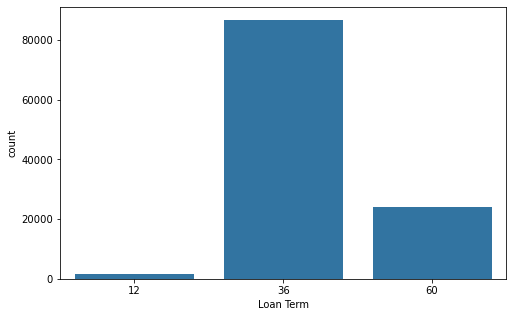

In [623]:
Fig_size = [4,4] #set figure size
bar_plot(loan_df, 'Term', 'Loan Term', fig_size) #set data

60months is the highest loan term for the loans with 36months being the most common type of loan term.

#### ListingCategory

In [624]:
loan_df['ListingCategory (numeric)'].value_counts()

1     57368
0     16965
7     10398
2      7279
3      7096
6      2538
4      2395
13     1967
15     1493
18      868
14      857
5       756
20      755
19      754
16      303
11      212
8       191
10       91
9        85
12       59
17       51
Name: ListingCategory (numeric), dtype: int64

In [625]:
# The values in the ListingCategory were represented with numbers
# I had to change the numbers to their appropraite text prior to visualization

dict = {'0' : 'Not Available', '1' : 'Debt Consolidation', '2' :  'Home Improvement', 
        '3' :  'Business', '4' : 'Personal Loan',  '5' : 'Student Use',  '6' : 'Auto',  
        '7' : 'Other',  '8' : 'Baby&Adoption',  '9' : 'Boat', '10' : 'Cosmetic Procedure',  
        '11' : 'Engagement Ring',  '12' : 'Green Loans',  '13' : 'Household Expenses', 
        '14' : 'Large Purchases',  '15' : 'Medical/Dental',  '16' : 'Motorcycle',  '17' : 'RV',  
        '18' : 'Taxes',  '19' : 'Vacation', '20' : 'Wedding Loans'}

list = []
for row in loan_df['ListingCategory (numeric)']:
    if row in range(21):
        res = dict[str(row)]
        list.append(res)
    else:
        res = row
        list.append(res)
loan_df['ListingCategory'] = list

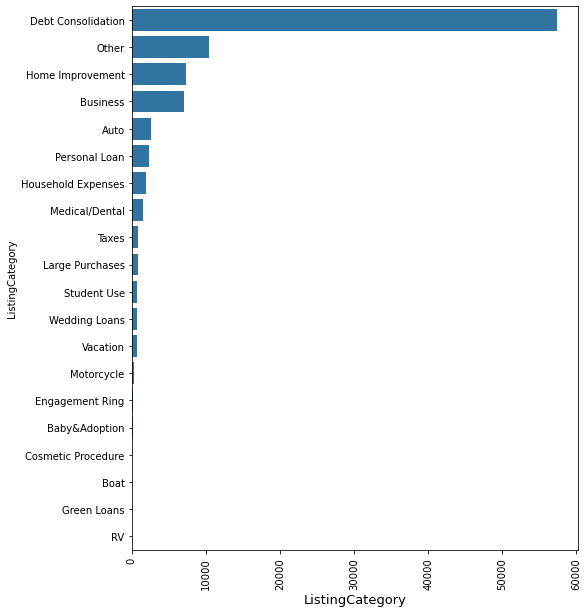

In [626]:
# barplot of ListingCategory

plt.figure(figsize = [8,10]) #set figure size

#set data, color and ordering
term_df = loan_df[loan_df['ListingCategory'] != 'Not Available']
sns.countplot(data = term_df, y = 'ListingCategory', 
         color = def_color, order = term_df['ListingCategory'].value_counts().index)

plt.xlabel('ListingCategory', size = 13) #set x axis title
plt.xticks(rotation = 90) # set the x label rotation

plt.show()

Top three reasons for loans are Debt Consolidation, Home Improvement and Business.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Majority of the ProsperScores are average with 4, 5 and 6 being the risk scores associated with most loans. However, more than half of the loans are on the positive side of the risk scores. I noticed some unusual points, I discovered that ProsperScores having values of 11 were present, this is unusual as it is outside the range of the accepted values, I had to remove them since they were not that many compared to the total values.

Looking at the OnTimeProsperPayment, the chart shows that most of the borrowers are always on time in terms of payments.

Other variables like CurrentDelinquencies, IncomeToDebtRatio have most of thier values below the median point, this support the earlier observation that most borrowers are on time payers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some unusual points were observed in ProsperScore and those values were removed.

## Bivariate Exploration

Bivariate Analysis shows the relationship between two variables. In this section, I will be using different visualization plots to show the relationship that exists between varaiables. Let's start off with a correlation plot to give us an overview of what we should be expecting.

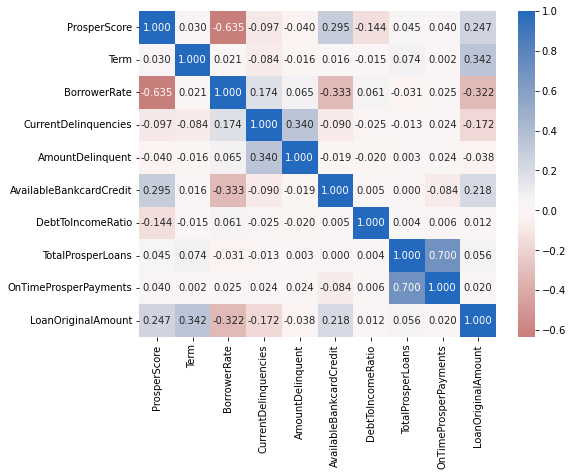

In [627]:
# let's plot a correlation plot to see the relationships between some of the variables

# variables to plot
corr_data = ['ProsperScore', 'Term', 'BorrowerRate', 'CurrentDelinquencies', 'AmountDelinquent', 
             'AvailableBankcardCredit', 'DebtToIncomeRatio', 'TotalProsperLoans', 'OnTimeProsperPayments', 
            'LoanOriginalAmount']

plt.figure(figsize = [8, 6]) # set figure size
sns.heatmap(loan_df[corr_data].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0) #set data and customize plot
plt.show()

As expected, we could see that some variables are positively correlated while others are negatively correlated. TotalProsperLoans and OnTimeProsperPayments are highly correlated, this shows that the earlier your loan payment, the more likely you are to be given another loan.

#### TotalProsperLoans & OnTimeProsperPayments

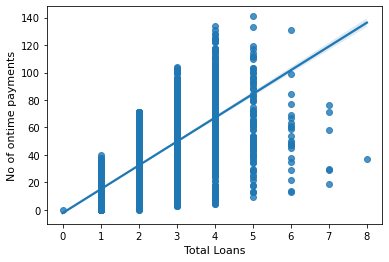

In [628]:
# regression plot

sns.regplot(data = loan_df, x = 'TotalProsperLoans', y = 'OnTimeProsperPayments' ) #data to plot
plt.xlabel('Total Loans', size = 11) # x_axis label and size
plt.ylabel('No of ontime payments', size = 11) # y-axis label and size

plt.show()

TotalProsperLoans and OnTimeProsperPayments are positively and highly correlated, the higher the OnTimeProsperPayments, the more likely a loan is to be granted.

#### ProsperScore vs LoanStatus

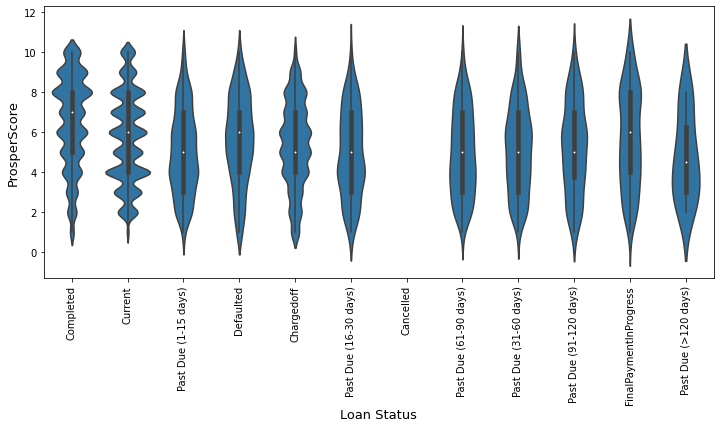

In [629]:
plt.figure(figsize = [12,5]) # set figure size

# set data, color and order of arrangements
sns.violinplot(data = loan_df, x = 'LoanStatus', y= 'ProsperScore', color= def_color)
plt.xlabel('Loan Status', size = 13) # x_axis label and size
plt.ylabel('ProsperScore', size = 13) # y-axis label and size
plt.xticks(rotation = 90) # xlabel rotation

plt.show()

For completed loans, we can see that the ProsperScore is quite high compare to others, also, most of the data are concentrated at the upper part of the violin. For loans that are due, the ProsperScores are quite low.

#### IncomeRange vs LoanOriginalAmount

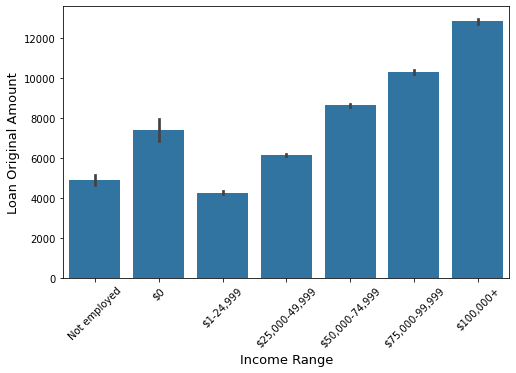

In [630]:
# display order of the IncomeRange Variable
categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
            '$75,000-99,999', '$100,000+']

plt.figure(figsize = [8,5]) # set figure size

# set data, color and order of arrangements
sns.barplot(data = loan_df[loan_df['IncomeRange'] != 'Not Available'], 
            x = 'IncomeRange', y= 'LoanOriginalAmount', color= def_color, order = categories)
plt.xlabel('Income Range', size = 13) # x_axis label and size
plt.ylabel('Loan Original Amount', size = 13) # y-axis label and size
plt.xticks(rotation = 45) # xlabel rotation
plt.show()

As expected, high income earners tend to take loans of high amount.

#### EmploymentStatus vs TotalProsperLoans

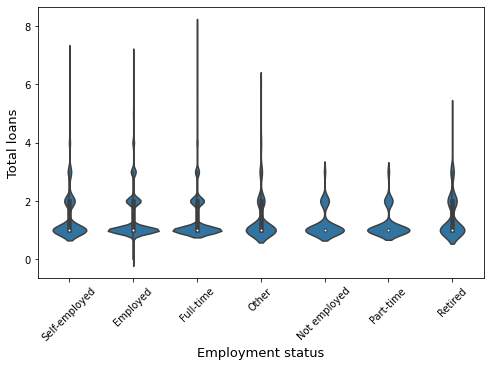

In [631]:
plt.figure(figsize = [8,5]) # set figure size

# set data, color and order of arrangements
sns.violinplot(data = loan_df[loan_df['EmploymentStatus'] != 'Not available'], x = 'EmploymentStatus', 
               y= 'TotalProsperLoans', color= def_color)
plt.xlabel('Employment status', size = 13) # x_axis label and size
plt.ylabel('Total loans', size = 13) # y-axis label and size
plt.xticks(rotation = 45) # xlabel rotation

plt.show()

Overall, the largest concentration of data is below the 2 point mark for all the employment status categories, this does not negate the fact that some few significantly higher data values are present in the data. 

Also, looking at the plot, the highest number of loans taken so far is from the Full-time category.

#### Term vs LoanOriginalAmount

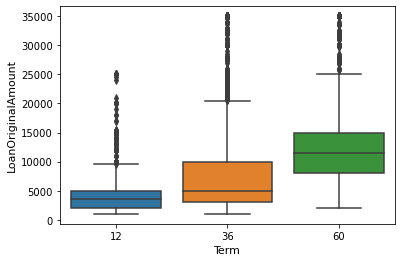

In [632]:
# box plot

sns.boxplot(data = loan_df, x = 'Term', y = 'LoanOriginalAmount' ) #data to plot
plt.xlabel('Term', size = 11) # x_axis label and size
plt.ylabel('LoanOriginalAmount', size = 11) # y-axis label and size

plt.show()

Looking at the three boxes above, it's quite clear that the interquartile range of the third box(60months term) is above the other two signifying higher concentration of data. This is alo through for the top quartile. It is safe to conclude that the higher the amount of loan, the higher it is to likely come with a longer term.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected, TotalProsperloans was highly and positively correlated with OnTimeProsperPayments, looking at the regression line on the scatter plot, the line clearly shows the linear relationship between these two variables.

Another variable of interest is the ProsperScore. Looking at the violin plot between ProsperScore and Loan Status, it is clear that higher ProsperScore are mostly associated with completed loans while lower ProsperScore are mostly associated with defaulted loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is quite an interesting observation between Term and Loan Amount. The higher the Loan Amount, the more likely it's going to come with a longer term.


## MultiVariate Exploration

#### IncomeRange vs LoanOriginalAmount vs Term

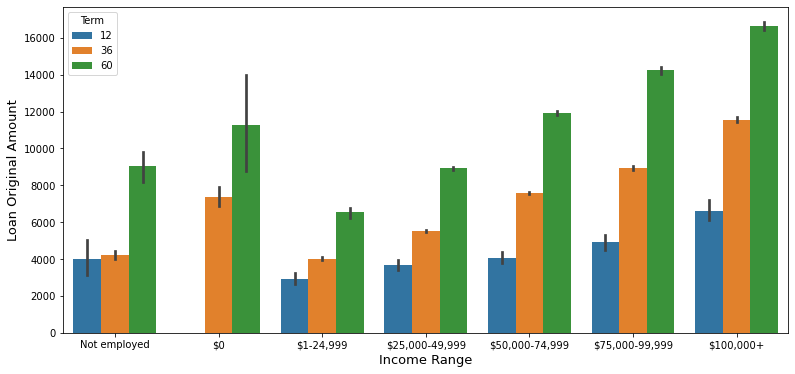

In [633]:
# display order of the IncomeRange Variable
categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
            '$75,000-99,999', '$100,000+']

plt.figure(figsize = [13,6]) # set figure size

# set data, color and order of arrangements
sns.barplot(data = loan_df[loan_df['IncomeRange'] != 'Not Available'], 
            x = 'IncomeRange', y= 'LoanOriginalAmount', hue= 'Term', 
            order = categories)
plt.xlabel('Income Range', size = 13) # x_axis label and size
plt.ylabel('Loan Original Amount', size = 13) # y-axis label and size

plt.show()

Looking at the three variables above, we can see that Loan increases with Income Range as well as the term of the loan, the only exception is for the first two categories (Not employed and $0) . The more a borrower earn, the more likely the borrower is to take a higher loan amount.

#### EmploymentStatus vs TotalProsperLoans vs IncomeVerifiable

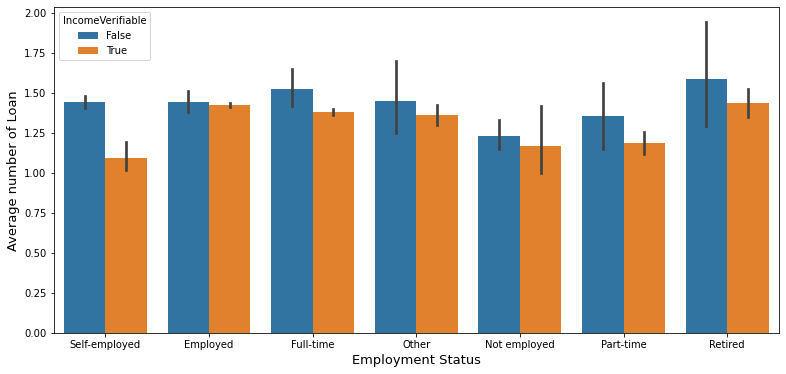

In [635]:
plt.figure(figsize = [13,6]) # set figure size

employment_group = loan_df[loan_df['EmploymentStatus'] != 'Not available']

sns.barplot(data = employment_group, x = 'EmploymentStatus', y= 'TotalProsperLoans', 
            hue= 'IncomeVerifiable')
plt.xlabel('Employment Status', size = 13) # x_axis label and size
plt.ylabel('Average number of Loan', size = 13) # y-axis label and size

plt.show()

The Retired category has the highest value in number of loans as well as in both IncomeVarifiable categories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I look at the impact of income on loan amount, I discovered that as income increases, loan amount also increases, adding a third variable (Loan Term), the same pattern plays out. As loan amount and income increase, loan term also increases.

Also, when employment status was plotted together with number of loans and IncomeVerifiable variable, the Retired category under employment status had the highest average loans as well as verifiable income sources.

### Were there any interesting or surprising interactions between features?

Some interesting interactions came up between features, Looking at the IncomeRange Variable, those without employment and no income got higher amount of loans than some income earners.